In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

from pyinverse.angle import Angle
from pyinverse.grid import RegularGrid
from pyinverse.axes import RegularAxes3
from pyinverse.ellipsoid import Ellipsoid
from pyinverse.phantom3 import Phantom3
from pyinverse.ray3 import ray_matrix

from pyviz3d.viz import Renderer

In [3]:
Nx = 90 // 2
Ny = 91 // 2
Nz = 92 // 2
axes3_viz = RegularAxes3.linspace((-1, 1, Nx), (-1, 1, Ny), (-1, 1, Nz))
axes3 = RegularAxes3.linspace((-1, 1, Nx), (-1, 1, Ny), (-1, 1, Nz))

D = 4
axes3_hires = RegularAxes3.linspace((-1, 1, Nx*D), (-1, 1, Ny*D), (-1, 1, Nz*D))

In [4]:
Nu = 93 // 2
Nv = 94 // 2
grid_uv = RegularGrid.linspace((-1, 1, Nu), (-1, 1, Nv))

In [5]:
#p3 = Phantom3()
#e3_4 = p3._ellipsoids[4]

In [6]:
ellipsoid = Ellipsoid(0.25, 0.1, 0.65,
                      0.25,    0, -0.25,
                      Angle(deg=0), Angle(deg=0), Angle(deg=0),
                      1)

In [7]:
c_z, c_y, c_x = axes3.centers

In [8]:
X_e = ellipsoid(c_x.flatten(), c_y.flatten(), c_z.flatten())
X_e.shape = axes3.shape

In [9]:
X_e[X_e == 0] = np.nan

In [10]:
X_e_actor =  axes3_viz.actor(X_e, blank_nan=True)

In [11]:
e_actor = ellipsoid.actor()
e_actor.GetProperty().SetOpacity(0.5)

In [12]:
ren = Renderer()
ren.depth_peeling_setup()
ren.add_actor(X_e_actor)
ren.add_actor(e_actor)
ren.axes_on((-1, 1, -1, 1, -1, 1))
ren.reset_camera()
#ren.start()

In [13]:
theta = Angle(deg=-90)
phi = Angle(deg=0)

In [14]:
A = ray_matrix(theta, phi, axes3, grid_uv)

100%|██████████████████████████████████████████████████████████████████████████████| 2162/2162 [00:13<00:00, 164.26it/s]


In [15]:
e_proj = ellipsoid.proj(theta, phi, grid_uv)

In [16]:
X_e[np.isnan(X_e)] = 0

In [17]:
e_proj_approx = A @ X_e.flat
e_proj_approx.shape = Nv, Nu

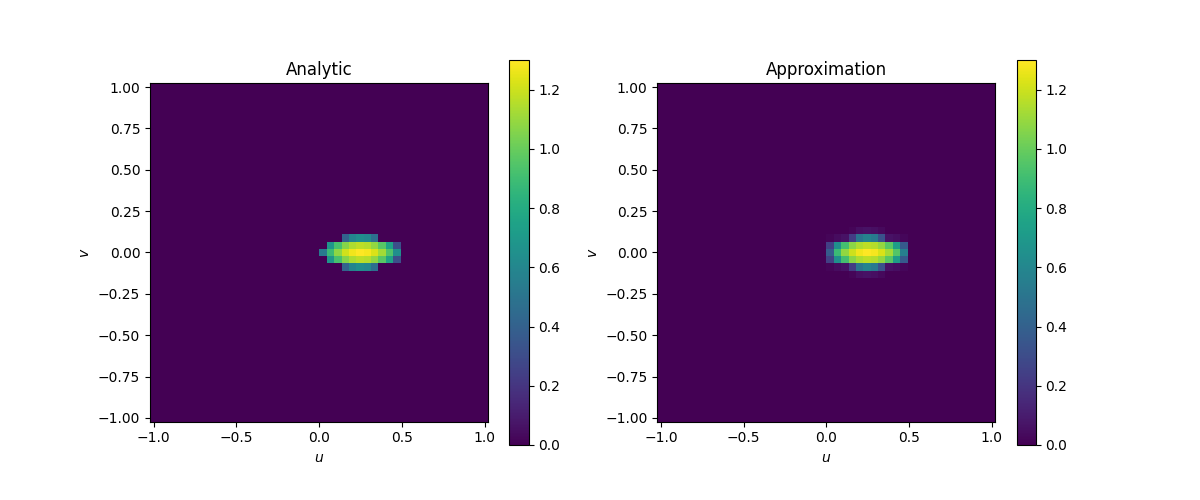

In [18]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
im0 = grid_uv.plot(ax[0], e_proj)
ax[0].set_xlabel(f'$u$')
ax[0].set_ylabel(f'$v$')
ax[0].set_title('Analytic')
plt.colorbar(im0, ax=ax[0])
im1 = grid_uv.plot(ax[1], e_proj_approx)
plt.colorbar(im0, ax=ax[1])
ax[1].set_xlabel(f'$u$')
ax[1].set_ylabel(f'$v$')
ax[1].set_title('Approximation');

In [19]:
p3 = Phantom3()
p3_proj = p3.proj(theta, phi, grid_uv)

In [20]:
X_p3 = p3(c_x.flatten(), c_y.flatten(), c_z.flatten())
X_p3.shape = axes3.shape

In [21]:
c_hires_z, c_hires_y, c_hires_x = axes3_hires.centers

X_p3_hires = p3(c_hires_x.flatten(), c_hires_y.flatten(), c_hires_z.flatten())
X_p3_hires.shape = axes3_hires.shape

In [22]:
ones = np.ones([D, D, D])
X_p3_hires_ma = sp.ndimage.convolve(X_p3_hires, ones/D**3, mode='constant')[::D, ::D, ::D]

In [23]:
p3_proj_approx = A @ X_p3.flat
p3_proj_approx.shape = Nv, Nu

In [24]:
p3_proj_approx_hires = A @ X_p3_hires_ma.flat
p3_proj_approx_hires.shape = Nv, Nu

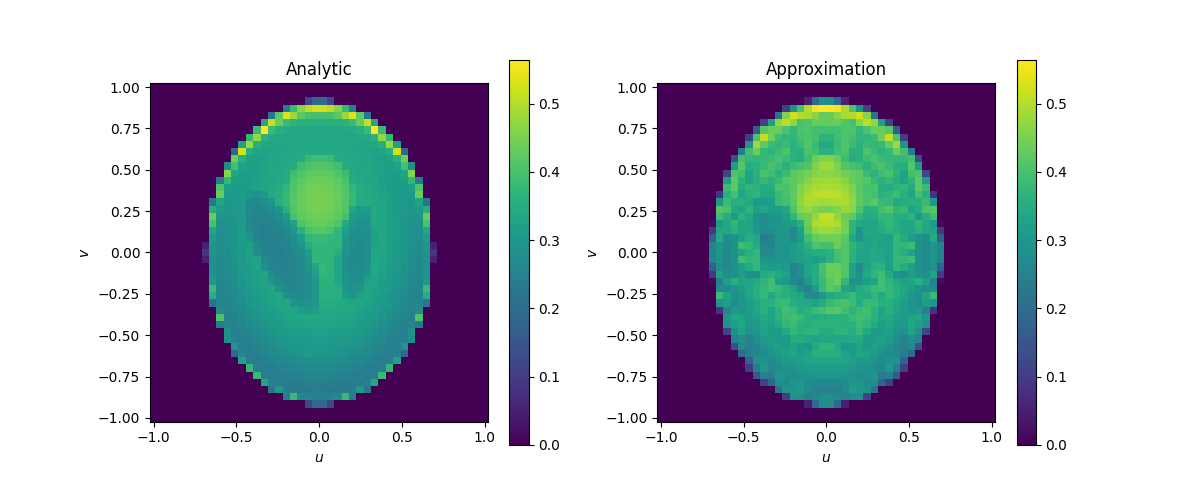

In [25]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
im0 = grid_uv.plot(ax[0], p3_proj)
plt.colorbar(im0, ax=ax[0])
ax[0].set_xlabel(f'$u$')
ax[0].set_ylabel(f'$v$')
ax[0].set_title('Analytic')
im1 = grid_uv.plot(ax[1], p3_proj_approx)
plt.colorbar(im0, ax=ax[1])
ax[1].set_xlabel(f'$u$')
ax[1].set_ylabel(f'$v$')
ax[1].set_title('Approximation');

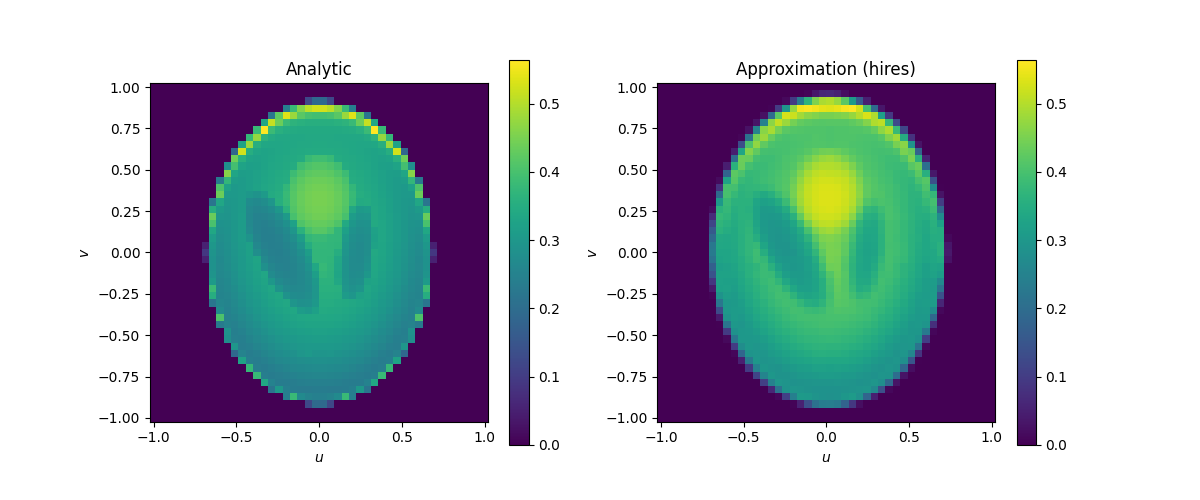

In [26]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
im0 = grid_uv.plot(ax[0], p3_proj)
plt.colorbar(im0, ax=ax[0])
ax[0].set_xlabel(f'$u$')
ax[0].set_ylabel(f'$v$')
ax[0].set_title('Analytic')
im1 = grid_uv.plot(ax[1], p3_proj_approx_hires)
plt.colorbar(im0, ax=ax[1])
ax[1].set_xlabel(f'$u$')
ax[1].set_ylabel(f'$v$')
ax[1].set_title('Approximation (hires)');